Bu projemizde CRISP - DM (Cross Industry Standard Process for Data Mining) metodolojisi temel alınacaktır.

### 1. Business Understanding (İş Problemini Anlamak)

Bir kişinin önceden belirlenmiş olan randevuya gelip gelmeyeceğinin tahmin edilmesi istenmektedir.
Bu problem için, gözetimli öğrenme yöntemlerinden sınıflandırma problemleri için kullanılan LogisticRegression,
DecisionTree, RandomForest, SVM (SupportVectorMachine) vb. modeller kullanılabilir. 

Gözetimsiz öğrenme yöntemlerinden yararlanmak istenirse de,  randevusuna gidecekler ve gitmeyecekler olarak hastaları kümelere ayırma veya segmente etme işlemi gerçekleştirilebilir. Bunun için de makine öğrenmesi modellerinden olan K-Ortalama Kümeleme (K-Mean Clustering) veya Yoğunluk Tabanlı Kümeleme (DBSCAN(density-based clustering non-parametric algorithm)) kullanılabilir.

### 2. Data Understanding(Veri Setini Anlamak)
Veri setimiz 
o 'PatientId', 
o 'AppointmentID', 
o 'Gender', 
o 'ScheduledDay', 
o 'AppointmentDay', 
o 'Age', 
o 'Neighbourhood', 
o 'Scholarship', 
o 'Hipertension', 
o 'Diabetes',
o 'Alcoholism', 
o 'Handcap',
o 'SMS_received', 
Target: 'No-show'
Hedef değişkeni No-show olan (hastanın randevuya gelip gelmemesi durumu) veri setine sahiptir. Toplamda hedef değişkenle beraber
14 özniteliğimiz bulunmaktadır. Bu veri setinde nümerik olarak Age değişkeni yer almaktadır. Diğer değişkenlerin çoğu sayısal görünümlü ancak kategorik değişkenlerdir.
AppointmentDay, ScheduledDay değişkenleri tarih veri tipine sahip değişkenler olmalarına rağmen object veri tipine sahip görünmektedirler.

### 3. Data Preparation(Veriyi Hazırlama)
Veriyi modele uygun olacak şekilde dönüştürmemiz gerekmektedir. LogisticRegresion gibi modeller string formatındaki verilerden dolayı model kuramazlar, bunun için gereksiz verilerin temizlenmesi (data cleanig), özellik çıkarımı (feature extraction) yöntemlerini kullanmamız gerekmektedir.
Herhangi bir anlam çıkaramayacağımız AppointmentID, PatientId değişkenlerini veri setinden atmamız gerekmektedir.
Modelin anlayabilmesi için Tarih değişkenine dönüştürülmesi gerekenlerin veri tipi to_datetime() fonksiyonu kullanılarak datetime'a dönüştürülmüştür. Buradan da yıl, ay, gün vb. özellikler çıkarılmıştır.
Modelin daha hızlı çalışabilmesi amacıyla one-hot-encoding ve rare encoding işlemleri gerçekleştirilmiştir.
Bu veri seti, dengesiz bir dağılıma sahiptir. 
No-show hedef değişkeninin 1 olması durumu: %20
Neighbourhood değişkeninde durum buna benzer olarak görünmektedir. 

    
    No-show
0    88208
1    22319

Handcap, Neighbourhood gibi satırlarda rare encoding işlemi gerçekleştirilebilir.
Model kurma aşamasında, Apointment_Year vb. değişkenler kullanılmayabilir. Bütün hepsi 2016 yılı içerisinde gelmişler. Bu pek bir anlam ifade etmiyor olabilir.



### 4. Modeling (Modelleme)
Problemimiz bir sınıflandırma problemi olduğu için LogisticRegression, NaiveBayes, SVC, XGBClassifier, Decision Tree, Random Forest
vb. modeller tercih edilebilir.
Modelin veri setinin büyüklüğü nedeniyle SVC yavaş çalışacaktır, bunun için bu modeli kullanmayı düşünmeyebilirsiniz. 
Çapraz doğrulama sonucu, modelin genelleme yeteneği daha iyi anlaşılacaktır. Bunun için kullanılacak modellerde GridSearchCV, RandomizedSearchCV vb. teknikler kullanılabilir.
KFold yapısı da tercih edilebilir.

### 5. Evaluation(Modeli Değerlendirme)
Modelimiz dengesiz bir veri dağılımına sahip olduğundan dolayı Accuracy score yerine AUC, F1 Score gibi metrikleri tercih etmemiz daha iyi olacaktır. 
Modellerin başarısında gözlemlediğim üzere, model ezber yapmaya müsaittir, accuracy score No-show değişkeninin 0 olması durumu için oldukça iyi olmasına rağmen, 1 değerini almasında oldukça başarısızdır. Bunun önüne geçebilmek için Suni veri artırma yöntemi kullanılabilir.
Biz de bunun önüne geçebilmek amacıyla 

### 6. Deployment (Dağıtım)



In [1]:
# import libraries
import pandas as pd # data manipulation, load dataset etc.
import numpy as np # linear algebra
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization

# Preprocessing (Veri Ön İşleme)
from sklearn.preprocessing import StandardScaler # preprocessing

# Modelling (Modelleme için)
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # Support Vector Machine Classifier
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB #NaiveBayes
from xgboost import XGBClassifier 
# train-test split
from sklearn.model_selection import train_test_split

# Model Evaluation (Model Değerlendirme)
# confussion matrix, auc, f1 score etc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# 2. Data Understanding

"""
import kagglehub
# Download latest version
path = kagglehub.dataset_download("joniarroba/noshowappointments")
print("Path to dataset files:", path)    
"""
dataset_path = r"D:\10MillionAI\Project\medical_appointment.csv"

medical_appointment = pd.read_csv(dataset_path)

if medical_appointment is None:
    raise FileNotFoundError("File path is not found.")

df = pd.DataFrame(medical_appointment)
# Show first 10 data
df.head(10)

def df_overview(dataframe):
    print("************************** Shape **************************")
    print(dataframe.shape)
    print(f"Total Observation: {dataframe.shape[0]}")
    print(f"Total Number of Features: {dataframe.shape[1]}")
    print("************************** Info **************************")
    print(dataframe.info)
    print("************************** Columns **************************")
    print(dataframe.columns)
    print("************************** Describe **************************")
    print(dataframe.describe())
    

In [3]:
# call the df_overview (Veri setimize genel bakış atalım)
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.float_format", lambda x: '%.3f' % x)
pd.set_option("display.width", 500)



df_overview(dataframe=df)

************************** Shape **************************
(110527, 14)
Total Observation: 110527
Total Number of Features: 14
************************** Info **************************
<bound method DataFrame.info of                  PatientId  AppointmentID Gender          ScheduledDay        AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show
0       29872499824296.000        5642903      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1         0           0        0             0      No
1      558997776694438.000        5642503      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0         0           0        0             0      No
2        4262962299951.000        5642549      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0         0           0        0             0  

In [5]:
# col list comp 
[col for col in df.columns]
""" 
for col in df.columns:
    print(col)
"""
# [df[col].dtype for col in df.column
def show_col_dtype(dataframe):
    for col in dataframe.columns:
        print(col,"'s dtype is: ", dataframe[col].dtype)
    
# call the function
show_col_dtype(dataframe = df)

PatientId 's dtype is:  float64
AppointmentID 's dtype is:  int64
Gender 's dtype is:  object
ScheduledDay 's dtype is:  object
AppointmentDay 's dtype is:  object
Age 's dtype is:  int64
Neighbourhood 's dtype is:  object
Scholarship 's dtype is:  int64
Hipertension 's dtype is:  int64
Diabetes 's dtype is:  int64
Alcoholism 's dtype is:  int64
Handcap 's dtype is:  int64
SMS_received 's dtype is:  int64
No-show 's dtype is:  object


In [6]:

# Categorical Columns
cat_cols = [col for col in df.columns if df[col].dtype == "O"]
# Numerical Columns

num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and
               df[col].dtype in ['int64', 'float64']]

num_cols = [col for col in df.columns if col not in num_but_cat
            and df[col].dtype in ['int64', 'float64']]


cat_cols = cat_cols + num_but_cat



print("Categorical Columns: ", cat_cols)
print("*"*100)
print("Numerical Columns: ", num_cols)
print("Numerical But Categorical: ", num_but_cat)

Categorical Columns:  ['Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'No-show', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
****************************************************************************************************
Numerical Columns:  ['PatientId', 'AppointmentID', 'Age']
Numerical But Categorical:  ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']


In [7]:
# NA 
df.isnull().sum() 



PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
# 
na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
print("NA Columns: ", na_cols) # boş bir liste döndü

# df_copy
df_copy = df.copy()
df_copy = df_copy.set_index("PatientId")
# df_copy = df_copy.drop('PatientId' ,axis= 1)
df_copy.head()

# Bilgi taşımayan sütunları silelim. AppointmentID herhangi bir bilgi taşımıyor.
df_copy = df_copy.drop("AppointmentID", axis= 1)
df_copy.head(10)


NA Columns:  []


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,
29872499824296.000,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
558997776694438.000,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4262962299951.000,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
867951213174.000,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8841186448183.000,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
95985133231274.000,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
733688164476661.000,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
3449833394123.000,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
56394729949972.000,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No


Kadın oranı: 65.00%
Erkek oranı: 35.00%


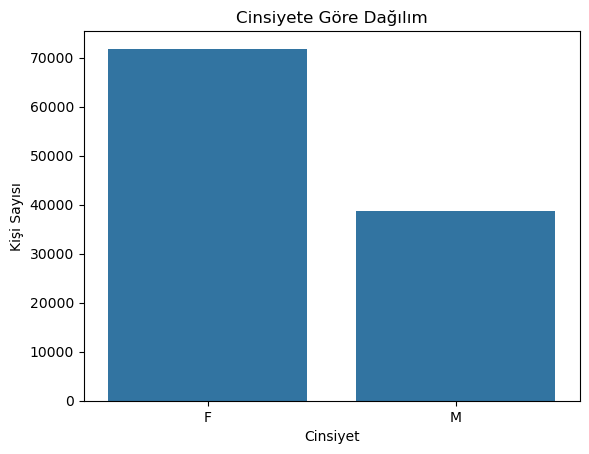

In [9]:
# Gender 
df_copy["Gender"].value_counts()

f_ratio = (df_copy["Gender"] == "F").mean()  # True = 1, False = 0
print(f"Kadın oranı: {f_ratio:.2%}")


m_ratio = (df_copy["Gender"] == "M").mean()
print(f"Erkek oranı: {m_ratio:.2%}")

#df_copy.groupby("Gender")["Age"].agg(["count", "mean"])

sns.countplot(x = "Gender", data= df_copy)
plt.title("Cinsiyete Göre Dağılım")
plt.xlabel("Cinsiyet")
plt.ylabel("Kişi Sayısı")
plt.show()


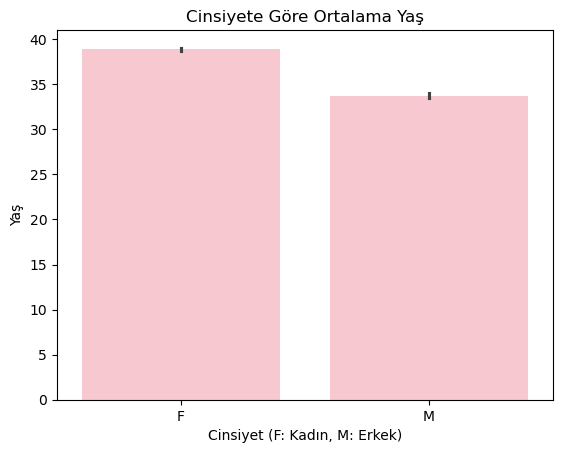

In [10]:
# Age 
mean_age = df_copy["Age"].mean() # 37.08

df_copy.groupby("Gender")["Age"].mean() # F: 38.893987 M: 33.736863

sns.barplot(x = "Gender", y = "Age", data= df_copy, color = "pink")
plt.title("Cinsiyete Göre Ortalama Yaş")
plt.xlabel("Cinsiyet (F: Kadın, M: Erkek)")
plt.ylabel("Yaş")
plt.show()

Hipertansiyonu Olmayanların Oranı: 80.28%
Hipertansiyonu Olanların Oranı:  19.72%


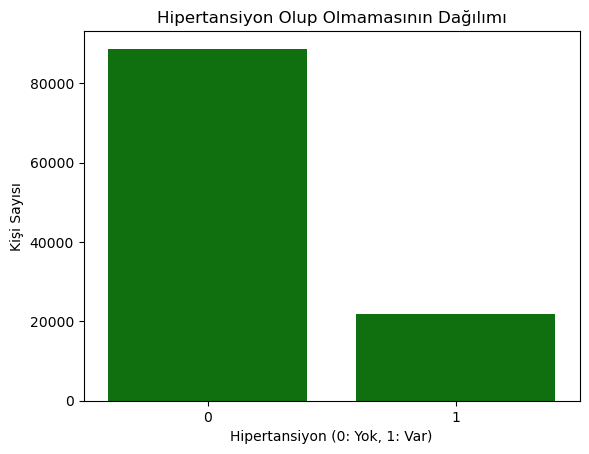

In [11]:
# hipertension
df_copy["Hipertension"].value_counts()  

no_hipertension_ratio = (df_copy["Hipertension"] == 0).sum() / len(df_copy)
print(f"Hipertansiyonu Olmayanların Oranı: {no_hipertension_ratio:.2%}")

yes_hipertension_ratio = (df_copy["Hipertension"] == 1).sum() / len(df_copy)
print(f"Hipertansiyonu Olanların Oranı: {yes_hipertension_ratio: .2%}")



sns.countplot(x = "Hipertension", data= df_copy, color = "green")
plt.title("Hipertansiyon Olup Olmamasının Dağılımı")
plt.xlabel("Hipertansiyon (0: Yok, 1: Var)")
plt.ylabel("Kişi Sayısı")
plt.show()

Diabet Olanların Oranı: 7.19%
Diabet Olmayanların Oranı: 92.81%


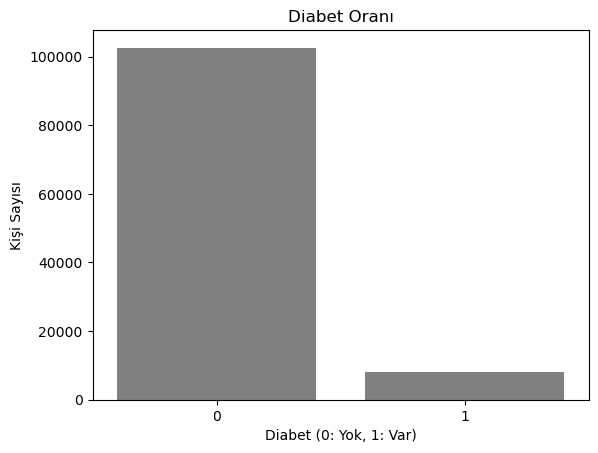

In [12]:
# Diabetes
df_copy["Diabetes"].value_counts()
diabetest_ratio = (df_copy["Diabetes"] == 1).sum() / len(df_copy)
print(f"Diabet Olanların Oranı: {diabetest_ratio:.2%}")

no_diabetes =(df_copy["Diabetes"] == 0).sum() / len(df_copy)
print(f"Diabet Olmayanların Oranı: {no_diabetes:.2%}")

# Alternative way : print(df_copy["Diabetes"].value_counts(normalize= True))

sns.countplot(x = "Diabetes", data = df_copy, color = "gray")
plt.title("Diabet Oranı")
plt.xlabel("Diabet (0: Yok, 1: Var)")
plt.ylabel("Kişi Sayısı")
plt.show()

Alkol Kullanmayan Oranı:  96.96%
Alkol Kullanan Oranı:  3.04%


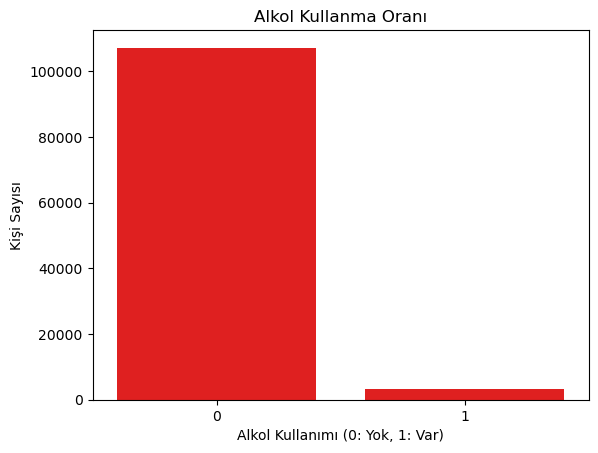

In [13]:
# Alcoholism
df_copy["Alcoholism"].value_counts()

alcoholism_rate = (df_copy["Alcoholism"] == 0).sum() / len(df_copy) 
print(f"Alkol Kullanmayan Oranı: {alcoholism_rate: .2%}")

no_alcoholism_rate = (df_copy["Alcoholism"] == 1).sum() / len(df_copy) 
print(f"Alkol Kullanan Oranı: {no_alcoholism_rate: .2%}")

sns.countplot(x = "Alcoholism", data = df_copy, color = "red")
plt.title("Alkol Kullanma Oranı")
plt.xlabel("Alkol Kullanımı (0: Yok, 1: Var)")
plt.ylabel("Kişi Sayısı")
plt.show()

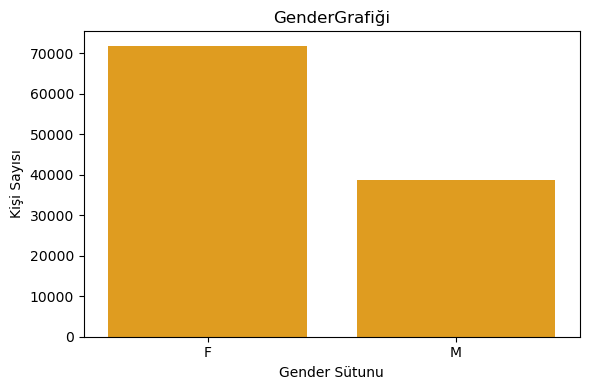

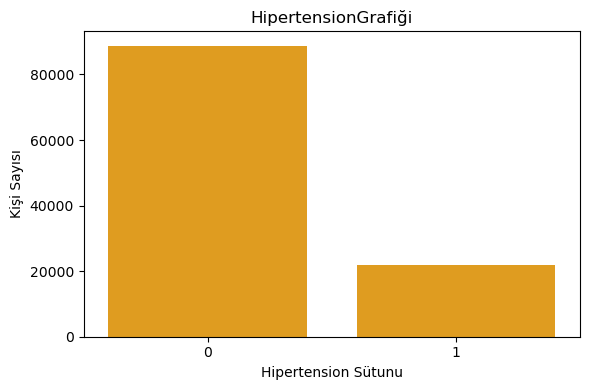

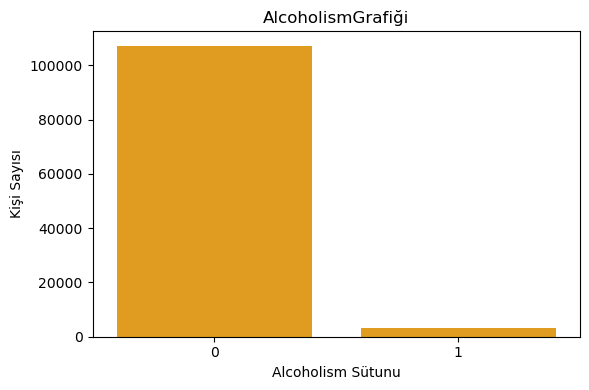

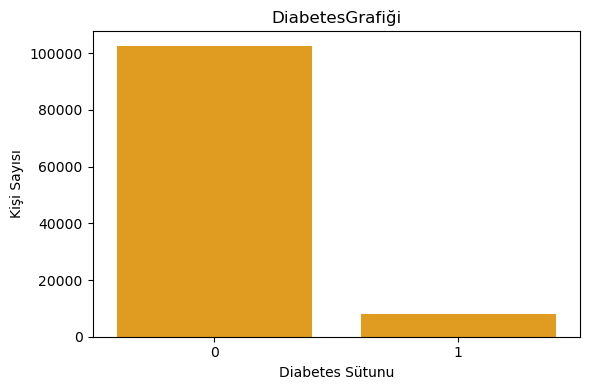

In [14]:
# Bunun için bir sınıf veya döngü de oluşturulabilir.
def show_countplot(dataframe, cat_cols, plot = False):
    for col in cat_cols:
        if plot:
            plt.figure(figsize=(6,4))
            sns.countplot(x = col, data = dataframe, color = "orange")
            plt.title(f"{col}Grafiği")
            plt.xlabel(f"{col} Sütunu")
            plt.ylabel("Kişi Sayısı")
          
            plt.tight_layout()
            plt.show()

show_countplot(dataframe= df_copy, cat_cols = ["Gender","Hipertension","Alcoholism","Diabetes"], plot = True )

o Yukarıdaki grafiklerde göründüğü üzere, kategorik olarak sayılabilecek değişkenlerin fonksiyon aracılığıyla görselleştirilmesi gerçekleştirildi. 

o Bunu fonksiyonel olarak gerçekleştirdik ancak cat_cols isimli değişkenler de programatik şekilde elde edilerek hataların önüne geçilebilir. 

o Verilerden yola çıkarak alkol kullanmama, diabete sahip olmama, hipertansiyona sahip olmama gibi sağlık açısından yararlı aktivitelerin randevu almış hastalarda yüksek oranda olması kayda değer olacaktır gibi görünmektedir. 

o Bunların ilişkisini hedef değişken olan No-show yani randevuya gelmeme durumuna göre incelememiz gerekecektir.


['Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'No-show', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']


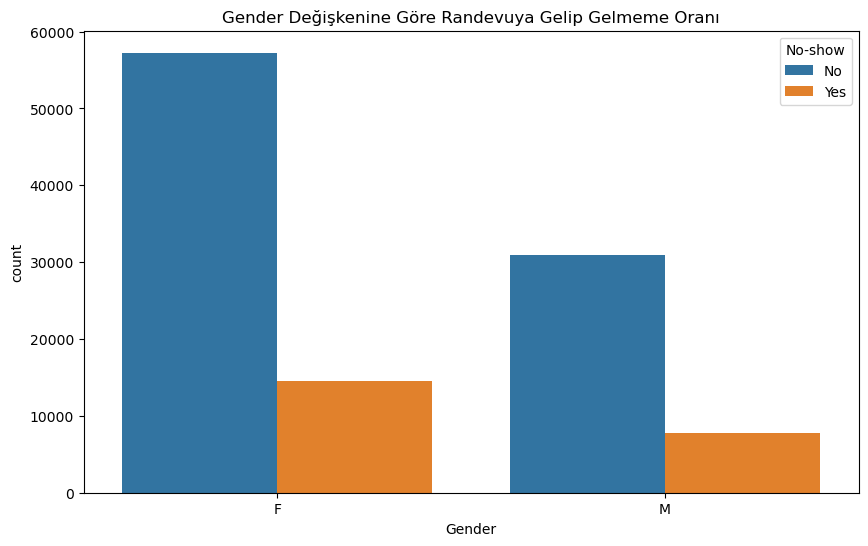

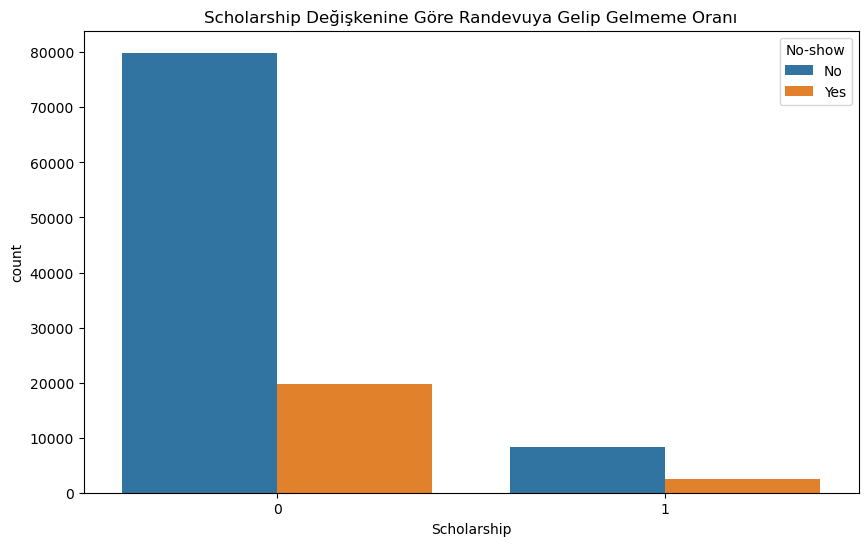

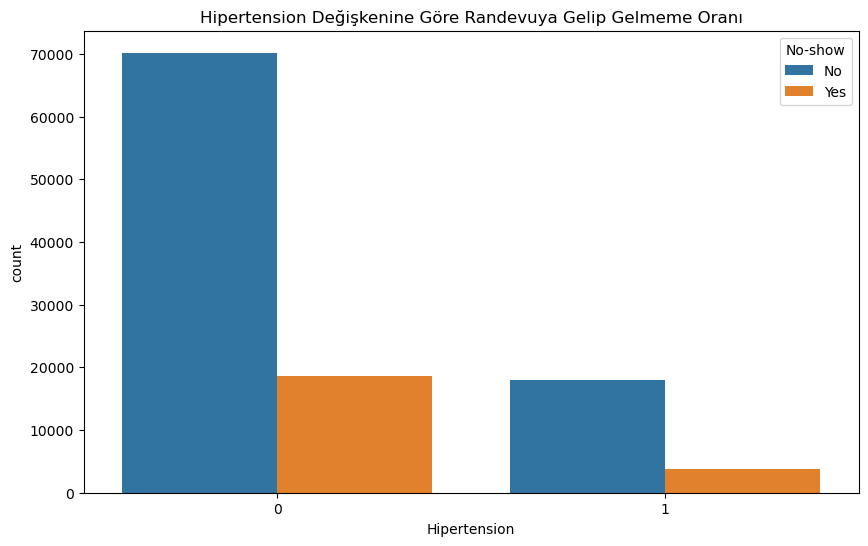

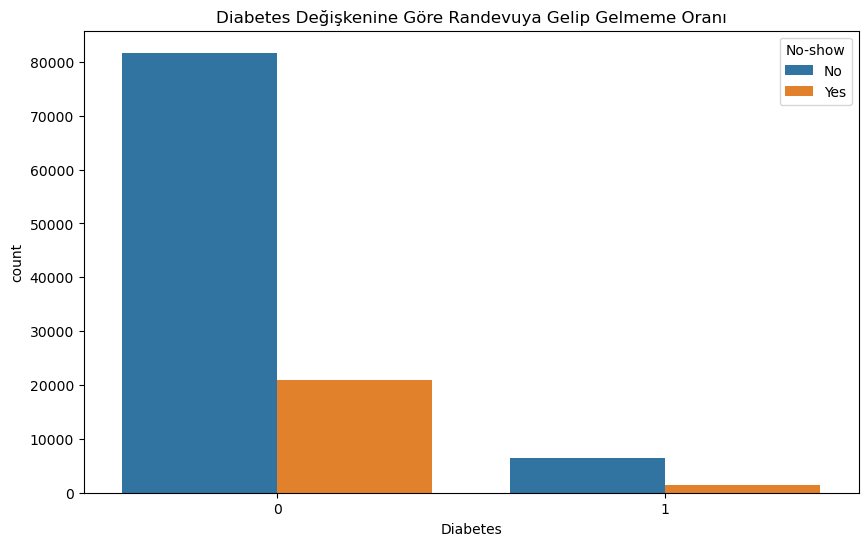

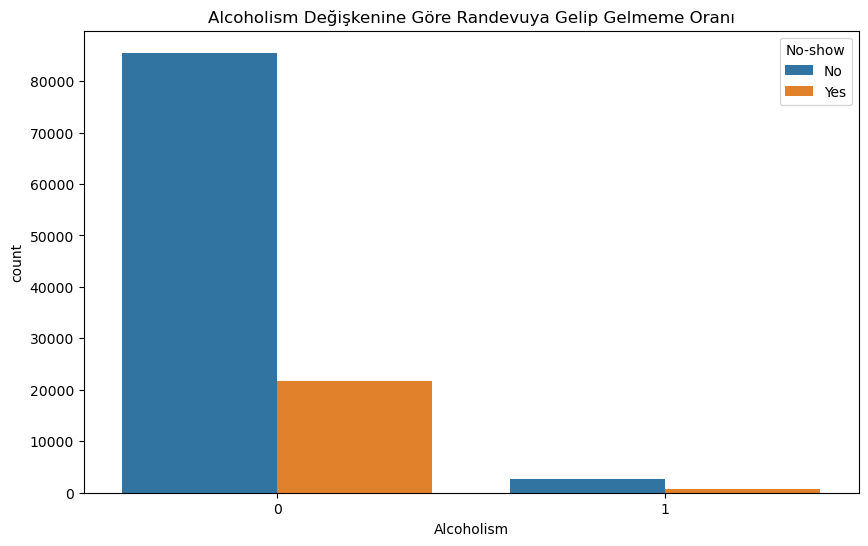

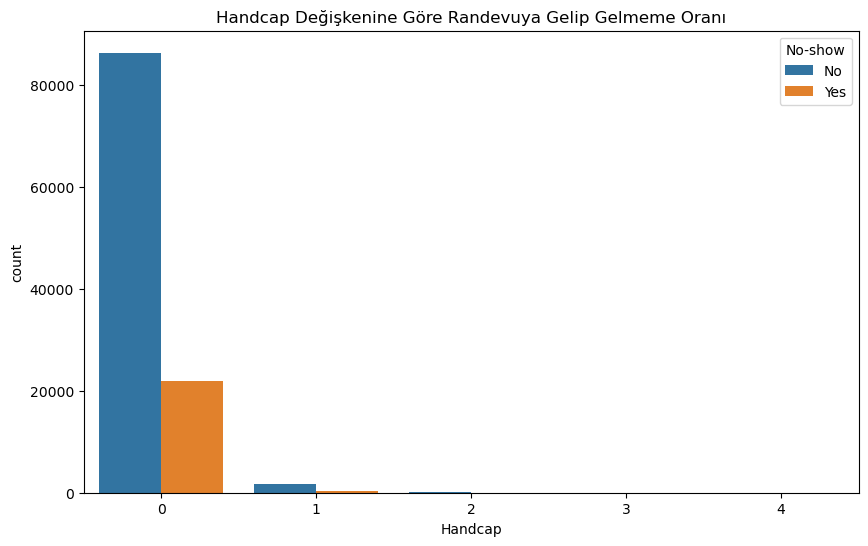

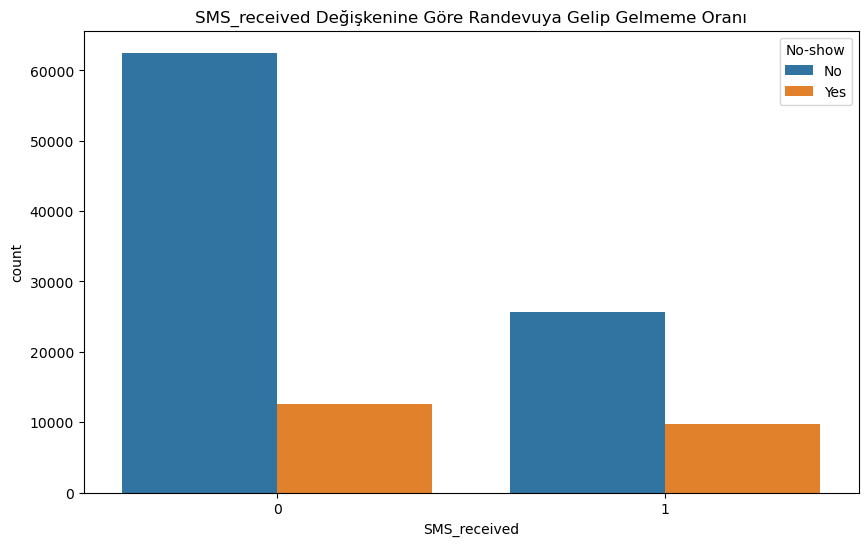

In [15]:
print(cat_cols)
origin_cat_cols = ['Gender', 'Scholarship','Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
def show_target_var_relationship(dataframe, col_names, target = 'No-show', plot = False):
    if plot:
        for col in col_names:
            plt.figure(figsize= (10, 6))
            sns.countplot(x = col, hue = target, data = dataframe)
            plt.title(f"{col} Değişkenine Göre Randevuya Gelip Gelmeme Oranı")
            plt.xlabel(f"{col}")
            
            plt.show()
        
show_target_var_relationship(dataframe= df_copy, col_names= origin_cat_cols, plot = True )

o Yukarıda görüldüğü üzere kategorik değişkenlerin hedef değişken olan No-show (Hastanın gelip gelmemesi, No-Show (Gelmedi)) ilişkisi gösterilmektedir. 

In [16]:
# Neighbourhood
df_copy["Neighbourhood"].value_counts()

df_copy["Neighbourhood"].nunique() # 81

sorted_neighbourhoods = df_copy["Neighbourhood"].value_counts().sort_values(ascending=False)

print(sorted_neighbourhoods)


Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO      

In [17]:
mean_neighborhoods = int(sorted_neighbourhoods.mean()) # 1364.53 int'e çevirelim
print("Neighborhoods Ortalaması: ", mean_neighborhoods)


Neighborhoods Ortalaması:  1364


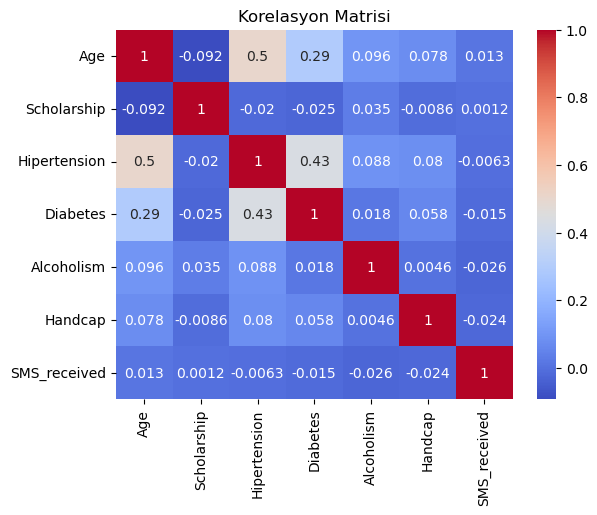

In [18]:
correlation_matrix = df_copy.corr(numeric_only= True)
sns.heatmap(correlation_matrix, annot= True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

# df_copy[["Age", "Hipertension", "Diabetes", "Scholarship"]].corr()

o Yukarıda görünene göre değişkenler arasında çok güçlü bir ilişki yoktur. En çok Age değişkeni ile hipertension değişkeni arasında %50'lik bir pozitif ilişki mevcuttur.

o Ardından hipertension ile diabetes değişkeni arasında %43'lük pozitif yönlü bir ilişki mevcuttur. 

o Diğer ilişkiler arasında negatif veya pozitif yönlü güçlü bir ilişki bulunmamaktadır.

o Ancak bu bir yanılgıdır, çünkü kategorik değişken olup nümerik gibi davranan değişkenler bulunmaktadır.
İlerleyen kodlarda bunların veri tipin değiştireceğiz.



In [19]:
# Outlier Detection
q1 = df_copy["Age"].quantile(0.25)
q3 = df_copy["Age"].quantile(0.75)

IQR = q3 - q1
print(f"Birinci Çeyrek Değeri: {q1}\nÜçüncü Çeyrek Değeri: {q3}\nÇeyrekler Arası Fark: {IQR} ")

upper_bound = q3 + 1.5 * IQR 
lower_bound = q1 - 1.5 * IQR
print(f"Aykırı Değer Sayılabilmesi İçin Gereken Alt Limit Eşiği: {lower_bound}")
print(f"Aykırı Değer Sayılabilmesi İçin Gereken Üst Limit Eşiği: {upper_bound}")

# Note: Age değişkeni sıfırdan küçük olamaz, bunun için aykırı değer olarak lower_bound'ı dikkate almaya gerek kalmaz.


def detect_outlier(dataframe, col_name, Q1 = 0.25, Q3 = 0.75):
    pass

Birinci Çeyrek Değeri: 18.0
Üçüncü Çeyrek Değeri: 55.0
Çeyrekler Arası Fark: 37.0 
Aykırı Değer Sayılabilmesi İçin Gereken Alt Limit Eşiği: -37.5
Aykırı Değer Sayılabilmesi İçin Gereken Üst Limit Eşiği: 110.5


In [21]:
# Convert Alcoholism's type 
df_copy["Alcoholism"] = df_copy["Alcoholism"].astype("object")
df_copy["Alcoholism"].dtype

# create a function
def convert_to_object(dataframe, num_but_cat):
    for col in num_but_cat:
        if dataframe[col].dtype != "object":
            dataframe[col] = dataframe[col].astype("object")
            print(f"{col} değişkeninin yeni veri tipi {dataframe[col].dtype}")
        else:
            print(f"{col} değişkeninin veri türü zaten {dataframe[col].dtype}")

convert_to_object(dataframe= df_copy, num_but_cat= num_but_cat)


Scholarship değişkeninin veri türü zaten object
Hipertension değişkeninin veri türü zaten object
Diabetes değişkeninin veri türü zaten object
Alcoholism değişkeninin veri türü zaten object
Handcap değişkeninin veri türü zaten object
SMS_received değişkeninin veri türü zaten object


In [23]:
print(cat_cols)
cat_cols = [col for col in cat_cols if col not in ["Neighbourhood", "AppointmentDay","ScheduleDay"]]
print(cat_cols)
# show_countplot(dataframe= df_copy, cat_cols = ['Gender', 'ScheduledDay', 'No-show', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received'], plot = True )


['Gender', 'ScheduledDay', 'No-show', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
['Gender', 'ScheduledDay', 'No-show', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']


# Feature Extraction
Bu veri setinde tarih değişkeni olup object türünde görünen değişkenler yer almaktadır. Bunun için bu değişkenlerin veri tipini datetime'a çevirebiliriz.

Bu çevrilen tarih değişkenlerinden de Yıl, Ay, Gün, Saat, Dakika vb. bilgileri yeni bir değişken olarak ortaya çıkarabiliriz.

Yaş ve cinsiyete göre bir eşleşme gerçekleştirerek gruplama gerçekleştirebiliriz. Bu işlemden önce cinsiyet değişkenini label encoding veya one hot encoding (drop_first = True) olacak şekilde standartlaştırabiliriz, bu aşamadan sonra yeni değişkenler oluşturabiliriz.


In [24]:
# Label encoding or One Hot Encoding
# One Hot Encoding
binary_cols = [col for col in df_copy.columns if df_copy[col].nunique() == 2 and
               df_copy[col].dtype == "O"]
ohe_cols = [col for col in df_copy.columns if 10 > df_copy[col].nunique() >2 and
               df_copy[col].dtype == "O"]

print(binary_cols)
print(ohe_cols)

binary_cols_not_in_target = [col for col in binary_cols if "No-show" not in col]
print(binary_cols)

date_cols = ["ScheduledDay","AppointmentDay"]
print(date_cols)

"""
İlkel bir şekilde gerçekleştirmeyi denersek ...
for col in date_cols:
    col = pd.to_datetime(df_copy[col])
    print(f"{col} değişkeninin veri tipi {col.dtype} 'a dönüştürüldü")
    
"""        
# in a programmatic way(Programatik bir şekilde)
def object_to_datetime(dataframe, date_cols):
     for col in date_cols:
        try:
            dataframe[col] = pd.to_datetime(dataframe[col], errors="coerce") 
            print(f"{col} değişkeni tarih değişkeni olabilir. Dönüşüm sonucu {dataframe[col].dtype}")
        except (ValueError, TypeError) as err:
            print(f"Dönüşüm Gerçekleştirilemedi. Hatanın nedeni de {err}")
        
    
object_to_datetime(dataframe= df_copy, date_cols= date_cols)

['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'No-show']
['Handcap']
['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'No-show']
['ScheduledDay', 'AppointmentDay']
ScheduledDay değişkeni tarih değişkeni olabilir. Dönüşüm sonucu datetime64[ns, UTC]
AppointmentDay değişkeni tarih değişkeni olabilir. Dönüşüm sonucu datetime64[ns, UTC]


In [25]:
def one_hot_encoder(dataframe, binary_cols, drop_first = True):
    
    dataframe = pd.get_dummies(dataframe, columns = binary_cols, drop_first= drop_first)
    return dataframe

one_hot_encoder(dataframe= df_copy, binary_cols =binary_cols)

df_ohe = one_hot_encoder(dataframe= df_copy, binary_cols =binary_cols)


In [26]:
df_copy["Handcap"].value_counts(normalize= True) # rare encoding yapılabilir
# Eşik değerinden düşük orana sahip olanları rare altında toplayan fonksiyonu yazalım
def rare_encoder(dataframe, col_name, rare_perc = 0.01):
    value_counts = dataframe[col_name].value_counts(normalize = True) # oranı verir
    rare_labels = value_counts[value_counts < rare_perc].index # değişkenin kendisini verir
    # Eşik değerden düşükleri Rare grubu altında topla
    dataframe[col_name] = dataframe[col_name].apply(lambda x: "Rare" if x in rare_labels else x)
    
    return dataframe

df_rare_encoded = rare_encoder(df_copy, "Handcap", rare_perc = 0.01)
print(df_rare_encoded[ohe_cols].value_counts())



Handcap
0          108286
1            2042
Rare          199
Name: count, dtype: int64


In [27]:
# Feture Extraction (Özellik Çıkartma)
from datetime import datetime as dt
print(date_cols)

['ScheduledDay', 'AppointmentDay']


In [28]:
print(df_ohe['AppointmentDay'].dtype)

# Year
df_ohe['Appointment_Year'] = df_ohe['AppointmentDay'].dt.year 

# Month
df_ohe['Appointment_Month'] = df_ohe['AppointmentDay'].dt.month 

# Day
df_ohe['Appointment_Day'] = df_ohe['AppointmentDay'].dt.day 

# Day name
df_ohe['Appointment_Day_Name'] = df_ohe['AppointmentDay'].dt.day_name()


# Year, Month, Day, Day_Name
df_ohe['Schedule_Year'] = df_ohe['ScheduledDay'].dt.year
df_ohe['Schedule_Month'] = df_ohe['ScheduledDay'].dt.month
df_ohe['Schedule_Day'] = df_ohe['ScheduledDay'].dt.day
df_ohe['Schedule_Day_Name'] = df_ohe['ScheduledDay'].dt.day_name()

# Hour, Minute
df_ohe['Schedule_Hour'] = df_ohe['ScheduledDay'].dt.hour
df_ohe['Schedule_Minutes'] = df_ohe['ScheduledDay'].dt.minute
df_ohe.head()

 


datetime64[ns, UTC]


,ScheduledDay,AppointmentDay,Age,Neighbourhood,Handcap,Gender_M,Scholarship_1,Hipertension_1,Diabetes_1,Alcoholism_1,SMS_received_1,No-show_Yes,Appointment_Year,Appointment_Month,Appointment_Day,Appointment_Day_Name,Schedule_Year,Schedule_Month,Schedule_Day,Schedule_Day_Name,Schedule_Hour,Schedule_Minutes
PatientId,,,,,,,,,,,,,,,,,,,,,,
29872499824296.000,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,False,False,True,False,False,False,False,2016,4,29,Friday,2016,4,29,Friday,18,38
558997776694438.000,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,True,False,False,False,False,False,False,2016,4,29,Friday,2016,4,29,Friday,16,8
4262962299951.000,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,False,False,False,False,False,False,False,2016,4,29,Friday,2016,4,29,Friday,16,19
867951213174.000,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,False,False,False,False,False,False,False,2016,4,29,Friday,2016,4,29,Friday,17,29
8841186448183.000,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,False,False,True,True,False,False,False,2016,4,29,Friday,2016,4,29,Friday,16,7


In [29]:
#df_ohe['Appointment_Diff'] = 
df_ohe['Appointment_Diff'] = (df_ohe['AppointmentDay'] - df_ohe['ScheduledDay']).dt.days
#df_ohe.head(10)

# Negatif değerler mevcut, bunları abs ile değiştirebiliriz.

df_ohe[(df_ohe['Appointment_Diff'] < 0)].agg({
    "Appointment_Diff": ["count", "mean"]
})




,Appointment_Diff
count,38568.000
mean,-1.000


In [30]:
df_ohe[(df_ohe['Appointment_Diff'] >= 0)].agg({
    "Appointment_Diff": ["count", "mean"]
})

,Appointment_Diff
count,71959.000
mean,14.642


In [31]:
# Hedef değişkeni de modeller için 0 - 1 'e çevir. 0 gelmemiş, 1 gelmiş
df_ohe['No-show']= df_ohe['No-show_Yes'].apply(lambda x: 1 if x == True else 0)
df_ohe.head()


,ScheduledDay,AppointmentDay,Age,Neighbourhood,Handcap,Gender_M,Scholarship_1,Hipertension_1,Diabetes_1,Alcoholism_1,SMS_received_1,No-show_Yes,Appointment_Year,Appointment_Month,Appointment_Day,Appointment_Day_Name,Schedule_Year,Schedule_Month,Schedule_Day,Schedule_Day_Name,Schedule_Hour,Schedule_Minutes,Appointment_Diff,No-show
PatientId,,,,,,,,,,,,,,,,,,,,,,,,
29872499824296.000,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,False,False,True,False,False,False,False,2016,4,29,Friday,2016,4,29,Friday,18,38,-1,0
558997776694438.000,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,True,False,False,False,False,False,False,2016,4,29,Friday,2016,4,29,Friday,16,8,-1,0
4262962299951.000,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,False,False,False,False,False,False,False,2016,4,29,Friday,2016,4,29,Friday,16,19,-1,0
867951213174.000,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,False,False,False,False,False,False,False,2016,4,29,Friday,2016,4,29,Friday,17,29,-1,0
8841186448183.000,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,False,False,True,True,False,False,False,2016,4,29,Friday,2016,4,29,Friday,16,7,-1,0


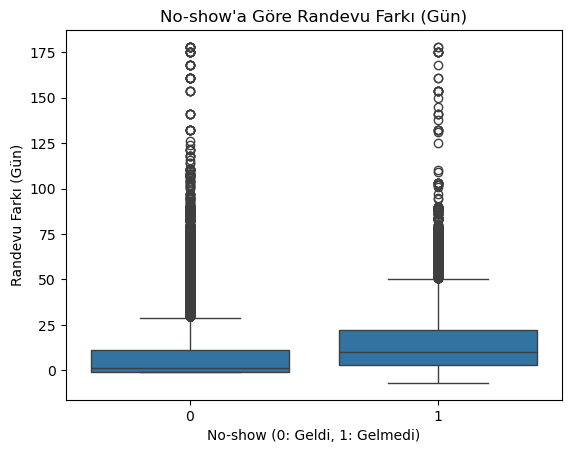

In [32]:
# Görselleştirelim
sns.boxplot(x="No-show", y="Appointment_Diff", data=df_ohe)
plt.title("No-show'a Göre Randevu Farkı (Gün)")
plt.xlabel("No-show (0: Geldi, 1: Gelmedi)")
plt.ylabel("Randevu Farkı (Gün)")
plt.show()

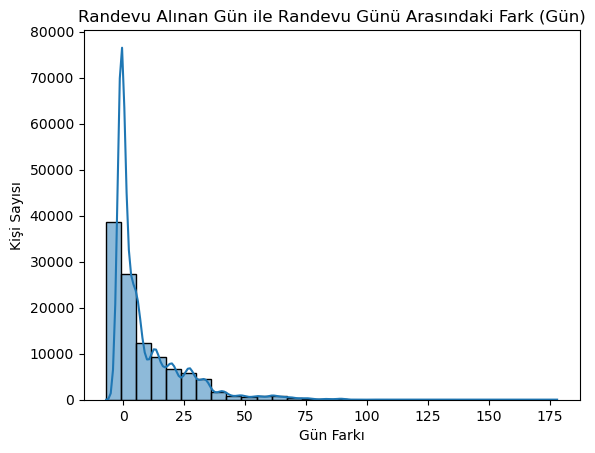

In [33]:
sns.histplot(df_ohe['Appointment_Diff'], bins=30, kde=True)
plt.title("Randevu Alınan Gün ile Randevu Günü Arasındaki Fark (Gün)")
plt.xlabel("Gün Farkı")
plt.ylabel("Kişi Sayısı")
plt.show()

In [34]:
# Ranevuyu önceden alanların oranı
neg_ratio = (df_ohe['Appointment_Diff'] < 0).sum() / len(df_ohe)
print(f"Randevuyu Önceden Alanların Oranı: {neg_ratio:.2%}")

Randevuyu Önceden Alanların Oranı: 34.89%


In [35]:
df_ohe.columns

Index(['ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Handcap', 'Gender_M', 'Scholarship_1', 'Hipertension_1', 'Diabetes_1', 'Alcoholism_1', 'SMS_received_1', 'No-show_Yes', 'Appointment_Year', 'Appointment_Month', 'Appointment_Day', 'Appointment_Day_Name', 'Schedule_Year', 'Schedule_Month', 'Schedule_Day', 'Schedule_Day_Name', 'Schedule_Hour', 'Schedule_Minutes', 'Appointment_Diff', 'No-show'], dtype='object')

In [36]:
#df_ohe.drop('No-show_Yes', inplace = True, axis= 1)
#df_ohe.head()
male_age_mean = df_ohe[df_ohe['Gender_M'] == 1]['Age'].mean()
print(f"Erkeklerin yaş ortalaması: {male_age_mean:.2f}")

female_age_mean = df_ohe[df_ohe['Gender_M'] == 0]['Age'].mean()
print(f"Kadınların yaş ortalaması: {female_age_mean:.2f}")


# Age x Gender Mixed
df_ohe[(df_ohe['Age'] < male_age_mean) & (df_ohe['Gender_M'] == 1)]['No-show'].agg(["count", "mean"])

df_ohe[(df_ohe['Age'] > male_age_mean) & (df_ohe['Gender_M'] == 1)]['No-show'].agg(["count", "mean"])

df_ohe[(df_ohe['Age'] < female_age_mean) & (df_ohe['Gender_M'] == 0)]['No-show'].agg(["count", "mean"])

df_ohe[(df_ohe['Age'] > female_age_mean) & (df_ohe['Gender_M'] == 0)]['No-show'].agg(["count", "mean"])






Erkeklerin yaş ortalaması: 33.74
Kadınların yaş ortalaması: 38.89


count   35957.000
mean        0.178
Name: No-show, dtype: float64

In [37]:
df_ohe.groupby("Gender_M")['No-show'].agg(["count","mean"])

,count,mean
Gender_M,,
False,71840,0.203
True,38687,0.200


In [38]:
# print(df_ohe["Alcoholism_1"].dtype) bool
df_ohe.groupby("Alcoholism_1")['No-show'].agg(["count","mean"])
 
#Fonksiyonlaştıralım
def no_show_rel(dataframe, col_names, target = "No-show"):
    for col in col_names:
        result = dataframe.groupby(col)[target].agg(["count", "mean"])
        print(f"'{col}' değişkenine göre '{target}' ilişkisi")
        print(result)
        print("*"*75)

df_ohe.columns       
interested_cols = ['Gender_M', 'Scholarship_1','Hipertension_1','Diabetes_1','Alcoholism_1', 'SMS_received_1']
no_show_rel(dataframe = df_ohe, col_names= interested_cols)

'Gender_M' değişkenine göre 'No-show' ilişkisi
          count  mean
Gender_M             
False     71840 0.203
True      38687 0.200
***************************************************************************
'Scholarship_1' değişkenine göre 'No-show' ilişkisi
               count  mean
Scholarship_1             
False          99666 0.198
True           10861 0.237
***************************************************************************
'Hipertension_1' değişkenine göre 'No-show' ilişkisi
                count  mean
Hipertension_1             
False           88726 0.209
True            21801 0.173
***************************************************************************
'Diabetes_1' değişkenine göre 'No-show' ilişkisi
             count  mean
Diabetes_1              
False       102584 0.204
True          7943 0.180
***************************************************************************
'Alcoholism_1' değişkenine göre 'No-show' ilişkisi
               count  mean
Alcoholis

In [39]:
print(df_ohe['No-show'].value_counts(dropna=False))
print(df_ohe['No-show'].unique())
print(df_ohe['No-show'].dtype)

No-show
0    88208
1    22319
Name: count, dtype: int64
[0 1]
int64


In [40]:
# Appointment_Year
df_ohe.groupby('Appointment_Year')['No-show'].agg(["count","mean"])
df_ohe['Appointment_Year'].min() # 2016
df_ohe['Appointment_Year'].max() # 2016



2016

In [41]:
df_ohe.groupby('Appointment_Month')['No-show'].agg(['count','mean'])

,count,mean
Appointment_Month,,
4,3235,0.196
5,80841,0.208
6,26451,0.185


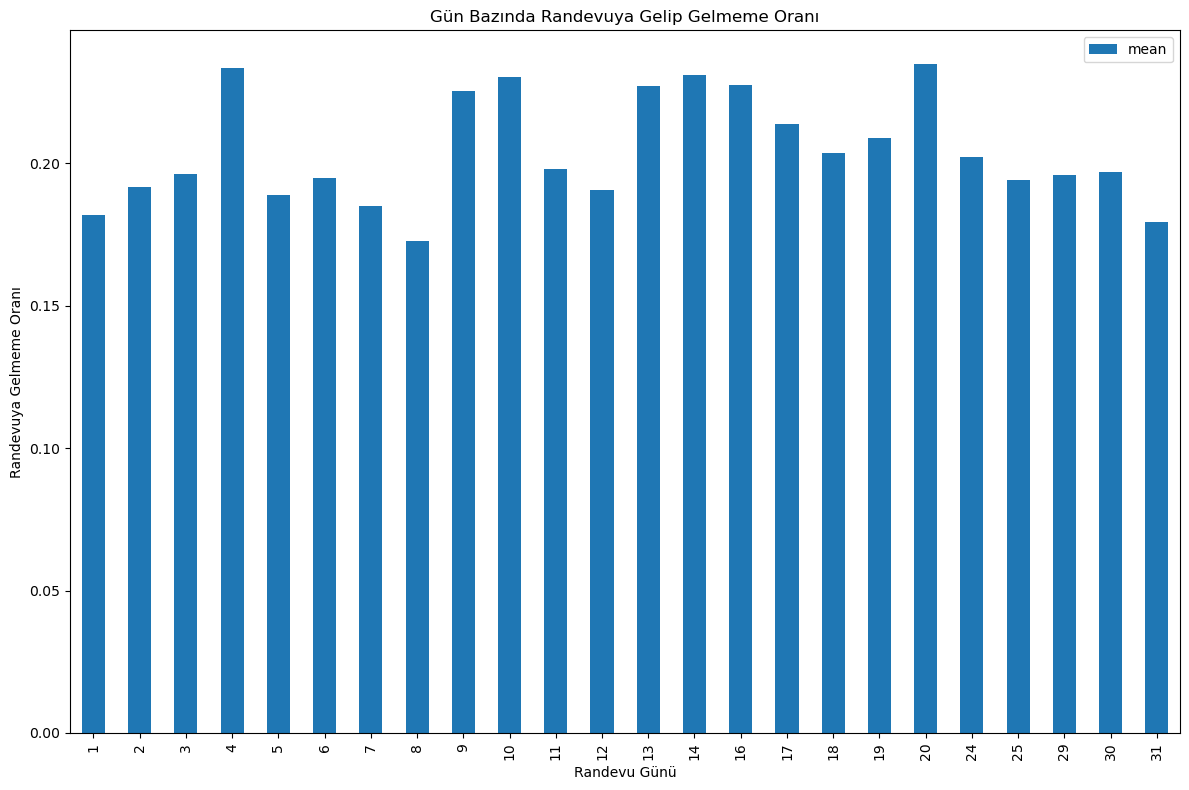

In [42]:
# Tarihlerin Sıralaması
sorted_date = df_ohe.sort_values(by='Appointment_Day', ascending=True).groupby('Appointment_Day')['No-show'].agg(['count', 'mean'])

sorted_date.plot(y = 'mean', kind='bar', title = "Gün Bazında Randevuya Gelip Gelmeme Oranı", figsize = (12,8))
plt.ylabel("Randevuya Gelmeme Oranı")
plt.xlabel("Randevu Günü")
plt.tight_layout()
plt.show()

In [43]:
# En çok randevu alınan tarihler
most_appointments_day = df_ohe["Appointment_Day"].value_counts().sort_values(ascending=False)
print(most_appointments_day)

Appointment_Day
2     8686
6     8571
3     8346
16    4613
9     4520
30    4514
8     4479
11    4474
1     4464
7     4416
12    4394
18    4373
17    4372
10    4308
31    4279
5     4273
19    4270
4     4168
24    4009
13    3987
25    3909
20    3828
29    3235
14      39
Name: count, dtype: int64


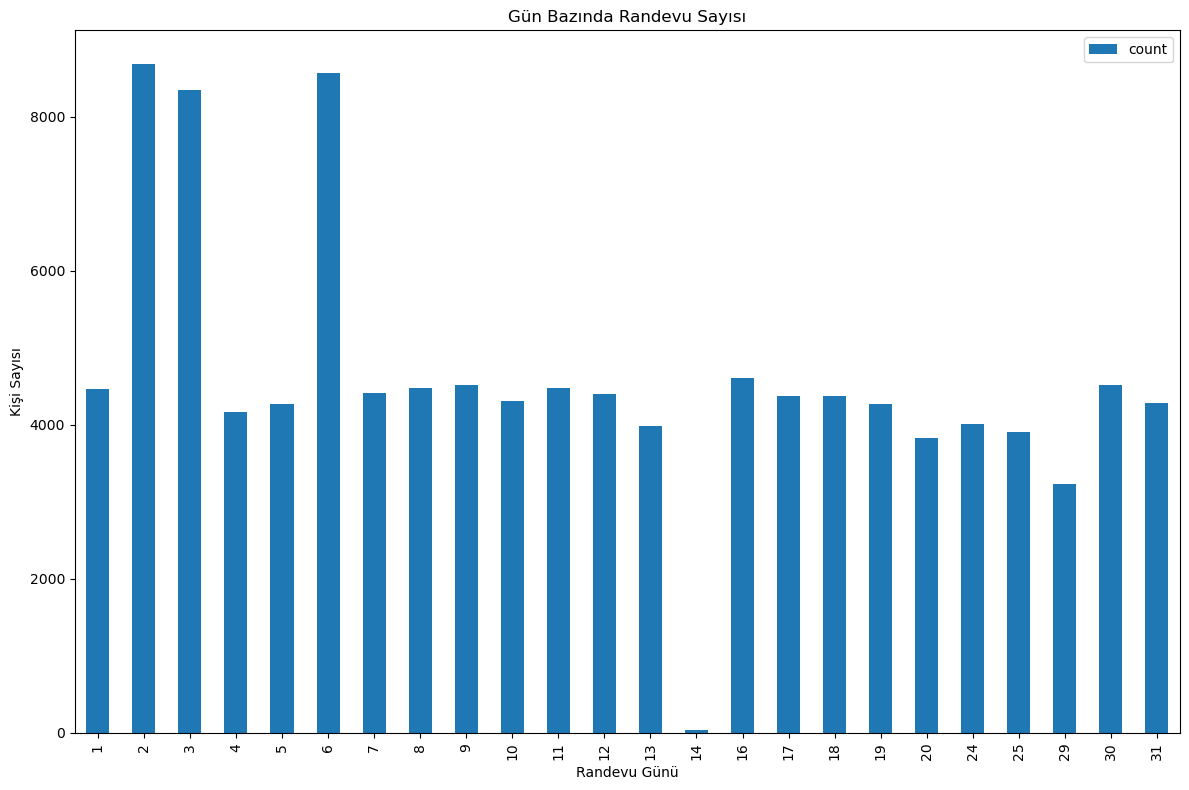

In [44]:
sorted_date.plot(y = 'count', kind='bar', title = "Gün Bazında Randevu Sayısı", figsize = (12,8))
plt.ylabel("Kişi Sayısı")
plt.xlabel("Randevu Günü")
plt.tight_layout()
plt.show()

In [45]:

df_ohe = rare_encoder(df_ohe, "Neighbourhood", rare_perc= 0.01)
# df_ohe = one_hot_encoder(df_ohe, ['Appointment_Day_Name', 'Schedule_Day_Name'])
df_ohe.head()

,ScheduledDay,AppointmentDay,Age,Neighbourhood,Handcap,Gender_M,Scholarship_1,Hipertension_1,Diabetes_1,Alcoholism_1,SMS_received_1,No-show_Yes,Appointment_Year,Appointment_Month,Appointment_Day,Appointment_Day_Name,Schedule_Year,Schedule_Month,Schedule_Day,Schedule_Day_Name,Schedule_Hour,Schedule_Minutes,Appointment_Diff,No-show
PatientId,,,,,,,,,,,,,,,,,,,,,,,,
29872499824296.000,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,False,False,True,False,False,False,False,2016,4,29,Friday,2016,4,29,Friday,18,38,-1,0
558997776694438.000,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,True,False,False,False,False,False,False,2016,4,29,Friday,2016,4,29,Friday,16,8,-1,0
4262962299951.000,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,Rare,0,False,False,False,False,False,False,False,2016,4,29,Friday,2016,4,29,Friday,16,19,-1,0
867951213174.000,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,Rare,0,False,False,False,False,False,False,False,2016,4,29,Friday,2016,4,29,Friday,17,29,-1,0
8841186448183.000,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,False,False,True,True,False,False,False,2016,4,29,Friday,2016,4,29,Friday,16,7,-1,0


In [46]:
df_ohe.groupby('Neighbourhood')['No-show'].value_counts().sort_values(ascending = False)

Neighbourhood        No-show
Rare                 0          17202
JARDIM CAMBURI       0           6252
MARIA ORTIZ          0           4586
Rare                 1           4192
RESISTÊNCIA          0           3525
JARDIM DA PENHA      0           3246
SANTA MARTHA         0           2635
CENTRO               0           2631
ITARARÉ              0           2591
TABUAZEIRO           0           2559
SANTO ANTÔNIO        0           2262
BONFIM               0           2223
JESUS DE NAZARETH    0           2157
SANTO ANDRÉ          0           2063
JABOUR               0           2058
CARATOÍRA            0           1974
SÃO PEDRO            0           1933
NOVA PALESTINA       0           1862
DA PENHA             0           1788
ROMÃO                0           1741
ANDORINHAS           0           1741
ILHA DO PRÍNCIPE     0           1734
GURIGICA             0           1562
SÃO JOSÉ             0           1549
FORTE SÃO JOÃO       0           1543
ILHA DE SANTA MARIA  

In [47]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
df_ohe['Age_MinMax_Scaler'] = minmax_scaler.fit_transform(df_ohe[['Age']])
df_ohe.head()

,ScheduledDay,AppointmentDay,Age,Neighbourhood,Handcap,Gender_M,Scholarship_1,Hipertension_1,Diabetes_1,Alcoholism_1,SMS_received_1,No-show_Yes,Appointment_Year,Appointment_Month,Appointment_Day,Appointment_Day_Name,Schedule_Year,Schedule_Month,Schedule_Day,Schedule_Day_Name,Schedule_Hour,Schedule_Minutes,Appointment_Diff,No-show,Age_MinMax_Scaler
PatientId,,,,,,,,,,,,,,,,,,,,,,,,,
29872499824296.000,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,False,False,True,False,False,False,False,2016,4,29,Friday,2016,4,29,Friday,18,38,-1,0,0.543
558997776694438.000,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,True,False,False,False,False,False,False,2016,4,29,Friday,2016,4,29,Friday,16,8,-1,0,0.491
4262962299951.000,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,Rare,0,False,False,False,False,False,False,False,2016,4,29,Friday,2016,4,29,Friday,16,19,-1,0,0.543
867951213174.000,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,Rare,0,False,False,False,False,False,False,False,2016,4,29,Friday,2016,4,29,Friday,17,29,-1,0,0.078
8841186448183.000,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,False,False,True,True,False,False,False,2016,4,29,Friday,2016,4,29,Friday,16,7,-1,0,0.491


In [48]:
# Modelling
# X ve y değerlerini ayır
print(df_ohe.columns)



X = df_ohe.drop(['No-show','No-show_Yes','ScheduledDay', 'AppointmentDay','Neighbourhood','Appointment_Day_Name','Schedule_Day_Name'], axis = 1)

y = df_ohe["No-show"]

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Models
# 1. Logistic Regression
lr_model = LogisticRegression(max_iter = 500)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))

# Dengesiz veri seti ile çalışıyoruz, gelmeyenleri tahmin etme oranı çok düşük.

Index(['ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Handcap', 'Gender_M', 'Scholarship_1', 'Hipertension_1', 'Diabetes_1', 'Alcoholism_1', 'SMS_received_1', 'No-show_Yes', 'Appointment_Year', 'Appointment_Month', 'Appointment_Day', 'Appointment_Day_Name', 'Schedule_Year', 'Schedule_Month', 'Schedule_Day', 'Schedule_Day_Name', 'Schedule_Hour', 'Schedule_Minutes', 'Appointment_Diff', 'No-show', 'Age_MinMax_Scaler'], dtype='object')
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17669
           1       0.34      0.02      0.04      4437

    accuracy                           0.80     22106
   macro avg       0.57      0.51      0.46     22106
weighted avg       0.71      0.80      0.72     22106



In [49]:
print(y.value_counts(normalize=True))

No-show
0   0.798
1   0.202
Name: proportion, dtype: float64


In [50]:
# Dengelemek lazım
lr_model = LogisticRegression(max_iter = 1000, class_weight= 'balanced')
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))
# Bellek için RandomSearch kullanalım.
from sklearn.model_selection import GridSearchCV # belleği daha çok yorar. 
from sklearn.model_selection import RandomizedSearchCV # rastgele örnekler
 
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['elasticnet'],
    'solver': ['saga'],
    'l1_ratio': [0, 0.1,0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9, 1]
}


rs_model = RandomizedSearchCV(
    estimator= LogisticRegression(max_iter=1000, class_weight='balanced'),
    param_distributions=param_grid,
    n_iter= 10,  # sadece 10 rastgele kombinasyon dener
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1, # bütün thread'lerin hepsini kullan 
    random_state=42,
    verbose = 2 # işlemlerin log değerini de görelim.
)

rs_model.fit(X_train_scaled, y_train)


print("Logistic Regreyon Modelinin En iyi parametreler:", rs_model.best_params_)
print("Logistik Regresyon Modelinin En iyi skoru:",rs_model.best_score_)

rs_best_model = rs_model.best_estimator_
y_pred = rs_best_model.predict(X_test_scaled)
print(rs_best_model)
print(confusion_matrix(y_test, y_pred))

# 12 dakika sürmesi beklenmektedir
""" 
lr_grid = GridSearchCV(LogisticRegression(max_iter = 1000), param_grid= param_grid, cv = 5,scoring= 'f1_weighted') 
lr_grid.fit(X_train_scaled, y_train) 

print("Logistic Regreyon Modelinin En iyi parametreler:", lr_grid.best_params_)
print("Logistik Regresyon Modelinin En iyi skoru:", lr_grid.best_score_)

# En iyi modeli testte kullan
lr_best_model = lr_grid.best_estimator_
y_pred = lr_best_model.predict(X_test_scaled)
"""


              precision    recall  f1-score   support

           0       0.86      0.68      0.76     17669
           1       0.31      0.55      0.39      4437

    accuracy                           0.66     22106
   macro avg       0.58      0.62      0.58     22106
weighted avg       0.75      0.66      0.69     22106

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Logistic Regreyon Modelinin En iyi parametreler: {'solver': 'saga', 'penalty': 'elasticnet', 'l1_ratio': 0.5, 'C': 100}
Logistik Regresyon Modelinin En iyi skoru: 0.694581129101317


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


' \nlr_grid = GridSearchCV(LogisticRegression(max_iter = 1000), param_grid= param_grid, cv = 5,scoring= \'f1_weighted\') \nlr_grid.fit(X_train_scaled, y_train) \n\nprint("Logistic Regreyon Modelinin En iyi parametreler:", lr_grid.best_params_)\nprint("Logistik Regresyon Modelinin En iyi skoru:", lr_grid.best_score_)\n\n# En iyi modeli testte kullan\nlr_best_model = lr_grid.best_estimator_\ny_pred = lr_best_model.predict(X_test_scaled)\n'

In [51]:
# Karar Ağaçları
dtc_model = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=10,
    min_samples_leaf=2
)

dtc_model.fit(X_train_scaled, y_train)

y_pred_dtc = dtc_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17669
           1       0.39      0.03      0.06      4437

    accuracy                           0.80     22106
   macro avg       0.59      0.51      0.47     22106
weighted avg       0.72      0.80      0.72     22106



In [52]:
# Rastgele Ormanlar

rfc_model = RandomForestClassifier(
    criterion= "log_loss",
    n_estimators= 100,
    max_depth = 10,
    min_samples_leaf= 4
)
rfc_model.fit(X_train_scaled, y_train)

y_pred_rfc = rfc_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17669
           1       1.00      0.00      0.00      4437

    accuracy                           0.80     22106
   macro avg       0.90      0.50      0.44     22106
weighted avg       0.84      0.80      0.71     22106



Modeller yukarıda görüldüğü üzere overfitting'e yatkındır. Bunun nedeni de veri setinin dağılımının iyi ölçeklenmemiş olması olabilir.GridSearchCV, RandomizedSearchCV gibi yöntemleri kullanarak modellerin en iyi parametrelerini öğrenebiliriz, aşırı öğrenmenin önüne geçebiliriz. 


In [53]:
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 3, 5, 7, 8, 10, 20],
    'min_samples_leaf': [2, 5, 7, 10, 15, 20],
    'class_weight': ['balanced', None]
}

grid_dtc = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1
)

grid_dtc.fit(X_train_scaled, y_train) # 5 dakika sürmesi beklenmektedir

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [3, 5, 7, 10, 15, 20],
                         'min_samples_leaf': [2, 5, 7, 10, 15, 20],
                         'min_samples_split': [2, 3, 5, 7, 8, 10, 20]},
             scoring='f1_weighted')

In [54]:
fine_tuned_dtc = DecisionTreeClassifier(max_depth=20, min_samples_leaf=20, random_state=42)
fine_tuned_dtc.fit(X_train_scaled, y_train)

y_pred_ft_dtc = fine_tuned_dtc.predict(X_test_scaled)
print(classification_report(y_test,y_pred_ft_dtc))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     17669
           1       0.36      0.14      0.21      4437

    accuracy                           0.78     22106
   macro avg       0.59      0.54      0.54     22106
weighted avg       0.72      0.78      0.74     22106



In [55]:
# Modelleri tek tek denemek yerine fonksiyon ile karşılaştırıp model seçimini gerçekleştirelim.
models = [
    ('LR', LogisticRegression()),
    ('DT', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    #('SVM', SVC()),
    ("RF", RandomForestClassifier()),
    ("XGB", XGBClassifier())
]
# SVC çok yavaş çalışacağından modellerden çıkartılabilir.
print(type(models))

from sklearn.model_selection import KFold, cross_val_score

model_name = []
model_f1_result = []

for name, model in models:
    kfold = KFold(shuffle = True, n_splits = 10, random_state = 42)
    cros_val_scores = cross_val_score(model, X_train_scaled, y_train, cv = kfold, scoring = "f1_macro", n_jobs = -1)
    model_name.append(name)
    model_f1_result.append(cros_val_scores)
    
    print(name," ' F1 Score Ortalaması: ", cros_val_scores.mean())

<class 'list'>
LR  ' F1 Score Ortalaması:  0.4614082129246097
DT  ' F1 Score Ortalaması:  0.5783549118512626
NB  ' F1 Score Ortalaması:  0.5449411948645603
RF  ' F1 Score Ortalaması:  0.5547175135587359
XGB  ' F1 Score Ortalaması:  0.5103154564824711


In [57]:
model_name = []
model_auc_result = []

for name, model in models:
    kfold = KFold(shuffle = True, n_splits = 10, random_state = 42)
    cros_val_scores = cross_val_score(model, X_train_scaled, y_train, cv = kfold, scoring = "roc_auc", n_jobs = -1)
    model_name.append(name)
    model_f1_result.append(cros_val_scores)
    
    print(name," 'AUC Score' Ortalaması: ", cros_val_scores.mean())

LR  'AUC Score' Ortalaması:  0.6685028155153422
DT  'AUC Score' Ortalaması:  0.5816521477288091
NB  'AUC Score' Ortalaması:  0.6466581382055855
RF  'AUC Score' Ortalaması:  0.7321365930450735
XGB  'AUC Score' Ortalaması:  0.736786654176343


o Dengesiz veri ile çalıştığımızdan kaynaklı Random Forest kullanmak daha mantıklı olacaktır. Daha az etkilenir ve AUC ve F1 Score değerleri modeller arasında karşılaştırıldığı vakit ön plana çıkmaktadır.


In [ ]:
# Random Forest Modeli Fine Tuning
# Azınlık olan sınıfı çok kötü tahminliyor, veri setindeki miktarını artırmak lazım.
from sklearn.metrics import make_scorer, f1_score # az olan sınıfa odaklanalım

f1_minority = make_scorer(f1_score, pos_label = 1)
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # farklı bölme stratejileri
    'max_depth': [3, 5, 10, 15, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20, 30, 40, 50, 100],
    'min_samples_leaf': [1, 2, 5, 10, 15,20, 25, 50],
    'class_weight': ['balanced'],
    "n_estimators": [50, 100, 150, 200, 300, 400, 500, 1000]
}

rcv_rf = RandomizedSearchCV(estimator= RandomForestClassifier(random_state= 42),
                            param_distributions= param_grid,
                            n_iter= 20,
                            cv = 5,
                            verbose= 1,
                            n_jobs= -1)

# Model Fit
rcv_rf.fit(X_train_scaled, y_train)

print("Random Forest Modeli İçin En İyi Parametreler: ", rcv_rf.best_params_)

# En iyi model
best_rf_model = rcv_rf.best_estimator_
# 15 dk 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Random Forest Modeli İçin En İyi Parametreler:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'log_loss', 'class_weight': 'balanced'}


[[17060   609]
 [ 3822   615]]
**************************************************


'              precision    recall  f1-score   support\n\n           0       0.82      0.97      0.89     17669\n           1       0.50      0.14      0.22      4437\n\n    accuracy                           0.80     22106\n   macro avg       0.66      0.55      0.55     22106\nweighted avg       0.75      0.80      0.75     22106\n'

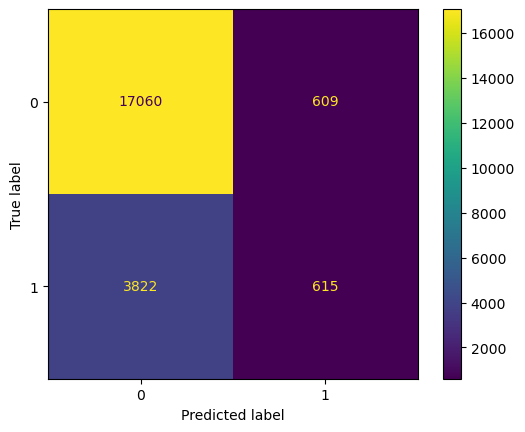

In [ ]:
fined_tuned_rf = RandomForestClassifier(n_estimators= 300, 
                                        min_samples_split= 2, 
                                        min_samples_leaf= 1, 
                                        max_depth= None, 
                                        criterion = 'log_loss', 
                                        class_weight= 'balanced'
    
)
fined_tuned_rf.fit(X_train_scaled, y_train)
y_pred_ft_rf = fined_tuned_rf.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_ft_rf)
print(cm)
print("*"*50)
cm_display = ConfusionMatrixDisplay(confusion_matrix= cm)
cm_display.plot()



In [65]:
print("Fine Tuned Random Forest Classification Report:\n ",classification_report(y_test, y_pred_ft_rf))


Fine Tuned Random Forest Classification Report:
                precision    recall  f1-score   support

           0       0.82      0.97      0.89     17669
           1       0.50      0.14      0.22      4437

    accuracy                           0.80     22106
   macro avg       0.66      0.55      0.55     22106
weighted avg       0.75      0.80      0.75     22106

